1)Autocovariance Function(AF)
时间序列与其滞后项的协方差

X为随机变量（即随着时间变化取值随机的变量,比如股票价格）,E表示求数学期望,u是随机变量X的均值


$AF_k=E[(X_t-\mu _t)(X_{t-k}-\mu_{t-k})]=Cov(X_t,X_{t-k})$



为了消除量纲影响：<br>
2)Autocorrelation Coefficient Function（ACF）
$ACF_k=\frac{Cov(X_t,X_{t-k})}{Var(X_t)}$<br>

但是这样会出现一个这样的现象，咱们以计算股票价格的实现序列数据为例：<br>
假设你研究的是今天的价格与昨天的价格的相关性，但是时间序列又是全部关联在一起的（也就是假设在一阶相关的情况下，今天的股票价格与昨天相关，但是昨天的价格也与前天相关，前天的股票价格又与大前天相关，以此类推，这样我们考察的相关性已经不是单纯的“今天价格”与“昨天价格”的相关性了，而是包含一系列价格信息综合影响），所以为了剔除之前其他交易日的价格信息的影响，单纯研究某一天（或者某一时期的价格）对今天的价格影响，我们引入Partial Autocorrelation Coefficient Function<br>

3）Partial Autocorrelation Coefficient Function(PACF)<br>
$PACF_t=Corr(X_t,X_{t-k}|X_{t-1},X_{t-2},X_{t-(k-1)})$

但是这个只是数学的表达，并未说明如何计算，我们将每一个时间序列中的$X_k$进行表达：<br>
$X_t=\Phi_{k1}X_{t-1}+\Phi_{k2}X_{t-2}+......\Phi_{kk}X_{t-k}+\mu_t$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tushare as ts
%matplotlib inline 

In [ ]:
token='09e4ce601d278a47514902d805936146d469550c6ec9c3b42d1d2343'
pro=ts.pro_api(token)

In [ ]:
df=pro.index_daily(ts_code="000001.SH")

In [ ]:
df.head()

In [ ]:
df.index=pd.to_datetime(df.trade_date)

In [ ]:
df=df.sort_index()[-250:]

In [ ]:
df.head()

In [ ]:
our_df=df.close

In [ ]:
our_df

In [ ]:
import statsmodels.tsa.api as smt
fig = plt.figure(figsize=(10, 8))

In [ ]:
acf=smt.stattools.acf(our_df,nlags=20)

In [ ]:
pacf=smt.stattools.pacf(our_df,nlags=20)

In [ ]:
acf

In [ ]:
pacf

In [ ]:
plt.style.context('bmh')
# plt.style.context('ggplot')
fig = plt.figure(figsize=(10, 8))
layout = (3,1)
ts_ax = plt.subplot2grid(layout, (0, 0))
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (2, 0))
data.plot(ax=ts_ax)
ts_ax.set_title('Stock Price Time Series Data')
smt.graphics.plot_acf(data, lags=30, ax=acf_ax, alpha=0.5)
acf_ax.set_title('Autocorrelation Coefficient')
smt.graphics.plot_pacf(data, lags=30, ax=pacf_ax, alpha=0.5)
pacf_ax.set_title('Partial Autocorrelation Coefficient')
plt.tight_layout()

如果我们需要对时间序列数据进行预测，我们需要选取平稳的时期，因为时间序列可能会有大的“性质改变”，这样之前我们建立的模型就会失效，所以我们引入平稳性（Stationary）的概念：

1.时间序列的均值和方差为常数，因此其时序图应该围绕某一水平线上下以大致相同的幅度波动。如果该时序图存在明显递增、递减或周期性波动，则该时间序列很可能是不平稳的
2.自相关或偏自相关系数一般会快速减小至0附近或者在某一阶后变为0，而非平稳的时间序列的自相关系数一般是缓慢下降而不是快速减小
3.单位根检验:
1)Dickey-Fuller Test、Augmented Dickey-Fuller Test、Phillips-Perron Test

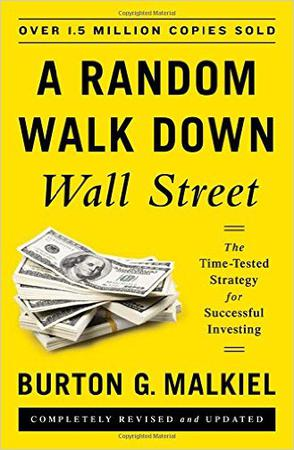

白噪音是一种完全随机的序列，也就是说在时间序列的任意一个时间t，都有
$E(X_t)=0 \; Var(X_t)=\sigma ^2 \; ACF_k=0$
各变量独立并且都服从正态分布

$x_t = x_{t-1}+\varepsilon_t$<br>
$x_0=0,\varepsilon_{t} \sim N(0,\sigma_{\varepsilon}^2)$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
def ts_plot(data, lags=None,title=''):
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize=(10, 8))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        data.plot(ax=ts_ax)
        ts_ax.set_title(title+'time series plot')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('ACF')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('PACF')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ plot')        
        scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)
        pp_ax.set_title('PP plot') 
        plt.tight_layout()
    return

#使用numpy简单模拟白噪声过程
np.random.seed(1)
# plot of discrete white noise
randser = np.random.normal(size=500)
ts_plot(randser, lags=30,title='white noise')

NameError: name 'np' is not defined

In [4]:
import numpy as np
np.random.seed(8)

random_data_array = np.random.normal(size=250)

random_data_series = pd.Series(random_data_array)

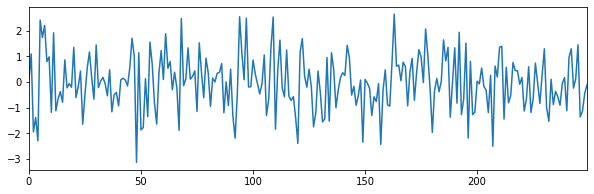

In [12]:
%matplotlib inline 
plt.style.context('bmh')
fig = plt.figure(figsize=(10, 3))

random_data_series.plot()

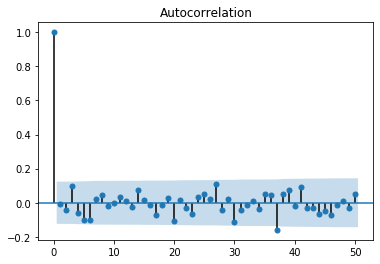

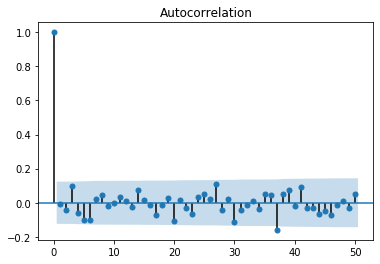

In [14]:
smt.graphics.plot_acf(random_data_series, lags=50)